In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [68]:
#defining starting and ending date for the application
start = '2009-12-31'
end = '2019-12-31' 

# Here the user will enter the stock ticker
df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535084
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430344


In [69]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835594
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221169
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194122
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.616669
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.139954


In [70]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535084
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430344


In [71]:
# Removing the headers which are not so useful in our analysis
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,73.172501,71.305000,72.364998,72.879997,144114400.0


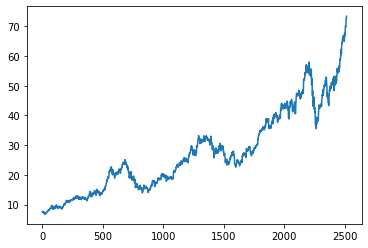

In [72]:
#Shows the closing point of the AAPL stock
plt.plot(df.Close)
df

In [73]:
# Calculating the moving average of the company
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

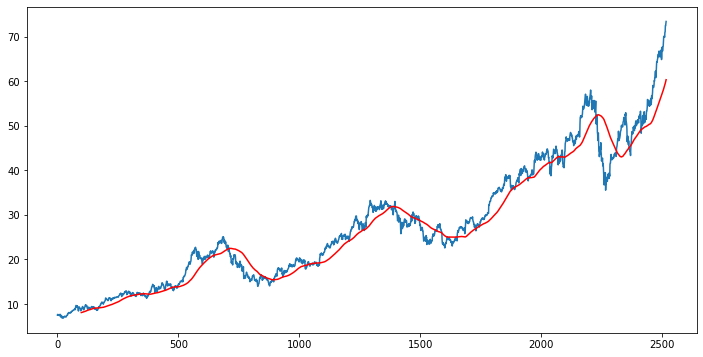

In [74]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

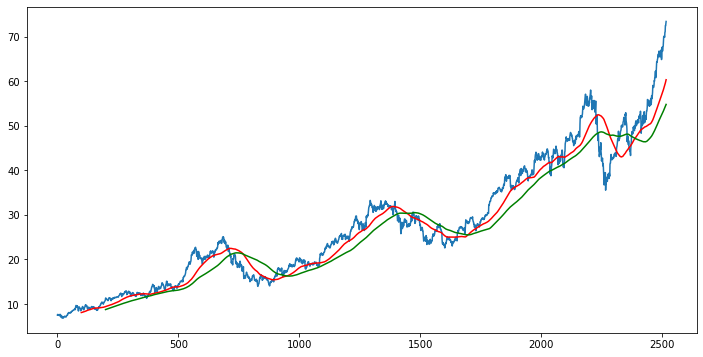

In [75]:
# Calculating the moving average for 200 days
ma200 = df.Close.rolling(200).mean()
ma200

#Plotting the moving average for 200 days and 100 days together
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [76]:
df.shape

(2517, 5)

In [77]:
# Splitting Data into training (70%) and testing (30%)
# We have chosen the CLOSE column from the Yahoo Data because we are interested into that only
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [78]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [79]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [80]:
# Scaling down the data between 0 and 1 for the LSTM Model

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [81]:
# Fitting the training data into the feature range defined above for LSTM Model --> Training data
# We have scaled down the training data and converted that into an array called data_training_array

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [82]:
# 1761 rows are in the training part and the rest are in the testing part
data_training_array.shape

(1761, 1)

In [83]:
# Defining two lists for prediction 

x_train = []
y_train = []

# step size = 100
# append(i-100), because we want to start our x_train array from 0-100 and y_train array from the next value which
# which is controlled by our loop variable 'i'
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape # We see 100 as the number of columns which are acting as our features for the model 

(1661, 100, 1)

In [84]:
# ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [85]:
model = Sequential()

#Layer 1
model.add(LSTM(units=50, activation = 'relu', return_sequences = True, 
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

#Layer 2
model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

#Layer 3
model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

#Layer 4
model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

          
#Layer 5 and only one value which is the Closing Price
model.add(Dense(units = 1))

In [86]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_8 (LSTM)               (None, 120)              

In [113]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
# We chose Mean Squared Error because we are doing a time-domain analysis, other types of losses are usually used for the 
# classification purposes

model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 16s 210ms/step - loss: 0.0868
Epoch 2/50
52/52 [==============================] - 11s 212ms/step - loss: 0.0130
Epoch 3/50
52/52 [==============================] - 12s 240ms/step - loss: 0.0096
Epoch 4/50
52/52 [==============================] - 12s 223ms/step - loss: 0.0093
Epoch 5/50
52/52 [==============================] - 11s 217ms/step - loss: 0.0083
Epoch 6/50
52/52 [==============================] - 12s 228ms/step - loss: 0.0082
Epoch 7/50
52/52 [==============================] - 12s 228ms/step - loss: 0.0075
Epoch 8/50
52/52 [==============================] - 12s 237ms/step - loss: 0.0079
Epoch 9/50
52/52 [==============================] - 12s 238ms/step - loss: 0.0081
Epoch 10/50
52/52 [==============================] - 13s 243ms/step - loss: 0.0067
Epoch 11/50
52/52 [==============================] - 12s 237ms/step - loss: 0.0074
Epoch 12/50
52/52 [==============================] - 12s 232ms/step - loss: 0.0066
Epoch 13/50
5

In [114]:
model.save('keras_model.h5')

In [115]:
# to predict the values in testing data from the training data, we have to fetch the last 100 days data from the training
# set which can be obtained using data_training.tail() method
past_100_days = data_training.tail(100)

In [116]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [117]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [118]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [119]:
input_data.shape

(856, 1)

In [120]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [121]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [122]:
# Making predicitons
y_predicted = model.predict(x_test)

24/24 [==============================] - 3s 80ms/step


In [123]:
y_predicted.shape

(756, 1)

In [124]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [125]:
scaler.scale_

array([0.02099517])

In [126]:
y_predicted

array([[0.12545115],
       [0.12619069],
       [0.12683415],
       [0.12735493],
       [0.12774083],
       [0.12799194],
       [0.12812924],
       [0.12819621],
       [0.1282454 ],
       [0.12832361],
       [0.12846898],
       [0.1286974 ],
       [0.12901205],
       [0.12941468],
       [0.12989545],
       [0.13043532],
       [0.1310126 ],
       [0.1316033 ],
       [0.13219328],
       [0.13278951],
       [0.13339773],
       [0.13401772],
       [0.1346393 ],
       [0.13529919],
       [0.13609928],
       [0.13712421],
       [0.13844493],
       [0.14011931],
       [0.14218399],
       [0.14464523],
       [0.14747351],
       [0.15062116],
       [0.15401933],
       [0.157612  ],
       [0.16136055],
       [0.16520917],
       [0.16909958],
       [0.17297581],
       [0.17677927],
       [0.18045506],
       [0.18395776],
       [0.1872522 ],
       [0.19033605],
       [0.19320272],
       [0.19586146],
       [0.1983222 ],
       [0.20059498],
       [0.202

In [127]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

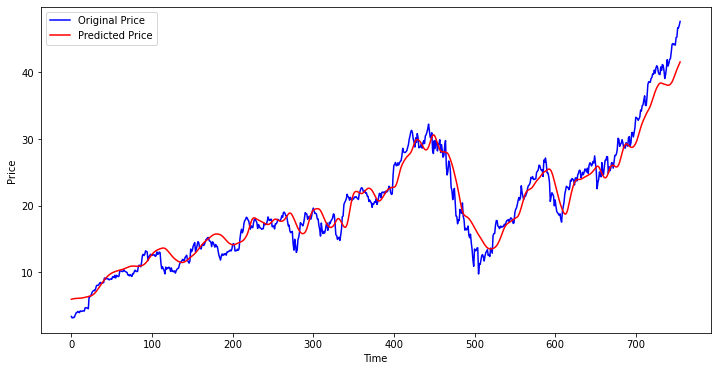

In [128]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()